# RATINGS PREDICTION PROJECT

Problem Statement:

We have a client who has a website where people write different reviews for technical products. Now they are adding a new feature to their website i.e. the reviewer will have to add stars (ratings) as well with the review. The rating is out 5 stars and it only has 5 options available 1 star, 2 stars, 3 stars, 4 stars and 5 stars. Now they want to predict ratings for the reviews which were written in the past and they don’t have a rating.

In [5]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# Importing nltk libraries
import re
import string
import missingno
import pandas_profiling
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import FreqDist

from scipy import stats
from scipy.stats import zscore
from scipy.sparse import hstack

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, precision_score, confusion_matrix, accuracy_score, classification_report

from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression

from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier


import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

lemmatizer = nltk.stem.WordNetLemmatizer()


In [6]:
df = pd.read_csv("/Users/pratiksingh/Desktop/Ratings_Datafile.csv")
df # checking the first five and last five rows of our dataset

,Unnamed: 0,Review_title,Review_text,Ratings
0,0,Suitable for School kids,\n If you are a College student or a professi...,2.0 out of 5 stars
1,1,Misrepresentation on MS Office 2019 license - ...,\n Update after one month usage - MS Office 2...,2.0 out of 5 stars
2,2,The sold me renewed laptop,\n It’s look like renewed laptop because lapt...,2.0 out of 5 stars
3,3,Amazon dupes with specification/ battery sucks,\n &nbsp;I had seen the specifications and bo...,2.0 out of 5 stars
4,4,Display back light issue,\n Display gone with 2 months.. But anyway th...,2.0 out of 5 stars
...,...,...,...,...
77545,77545,Nice product,good product,4
77546,77546,Awesome,Very good as expected and happy with the purchase,5
77547,77547,Awesome,I love it! No complaint!,5
77548,77548,Nice product,good product,4


# Exploratory Data Analysis

In [7]:
df.drop(columns = 'Unnamed: 0', inplace = True)
print("We have {} Rows and {} Columns in our dataframe".format(df.shape[0], df.shape[1]))
df.head(20)

We have 77550 Rows and 3 Columns in our dataframe


,Review_title,Review_text,Ratings
0,Suitable for School kids,\n If you are a College student or a professi...,2.0 out of 5 stars
1,Misrepresentation on MS Office 2019 license - ...,\n Update after one month usage - MS Office 2...,2.0 out of 5 stars
2,The sold me renewed laptop,\n It’s look like renewed laptop because lapt...,2.0 out of 5 stars
3,Amazon dupes with specification/ battery sucks,\n &nbsp;I had seen the specifications and bo...,2.0 out of 5 stars
4,Display back light issue,\n Display gone with 2 months.. But anyway th...,2.0 out of 5 stars
5,Battery life,\n Battery backup give only one hour . What d...,2.0 out of 5 stars
6,No for professional works,\n Blue screen while power on the linux Opera...,2.0 out of 5 stars
7,monitor power issue,\n monitor is not turning on from 2 weeks of ...,2.0 out of 5 stars
8,waste,\n waste of money sometimes screen was marks\n,2.0 out of 5 stars
9,Not able to download warranty card,\n Good\n,2.0 out of 5 stars


In [8]:
df.isna().sum() # checking for missing values


Review_title    9029
Review_text     8085
Ratings         9027
dtype: int64

<AxesSubplot:>

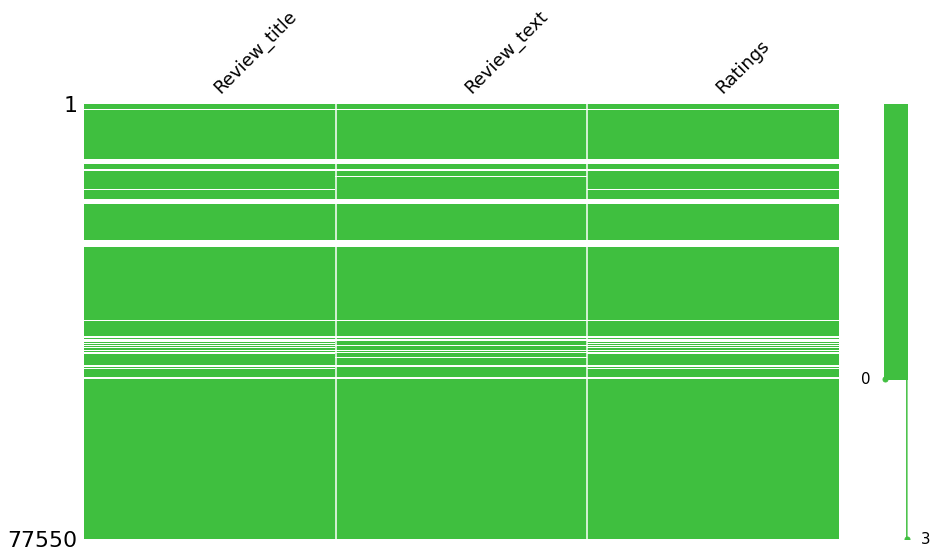

In [9]:
missingno.matrix(df, figsize = (15,8), color=(0.25, 0.75, 0.25), fontsize=18)

In [10]:
print("We have {} Rows and {} Columns in our dataframe before removing NaN".format(df.shape[0], df.shape[1]))
df.dropna(inplace=True)
print("We have {} Rows and {} Columns in our dataframe after removing NaN".format(df.shape[0], df.shape[1]))

We have 77550 Rows and 3 Columns in our dataframe before removing NaN
We have 68294 Rows and 3 Columns in our dataframe after removing NaN


In [11]:
df.isnull().sum()

Review_title    0
Review_text     0
Ratings         0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68294 entries, 0 to 77549
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Review_title  68294 non-null  object
 1   Review_text   68294 non-null  object
 2   Ratings       68294 non-null  object
dtypes: object(3)
memory usage: 2.1+ MB


In [13]:
df['Ratings'].unique()

array(['2.0 out of 5 stars', '3.0 out of 5 stars', '1.0 out of 5 stars',
       '5.0 out of 5 stars', '4.0 out of 5 stars', '5', '1', '4', '3',
       '2'], dtype=object)

In [14]:
df['Ratings'] = df['Ratings'].replace('1.0 out of 5 stars',1)
df['Ratings'] = df['Ratings'].replace('2.0 out of 5 stars',2)
df['Ratings'] = df['Ratings'].replace('3.0 out of 5 stars',3)
df['Ratings'] = df['Ratings'].replace('4.0 out of 5 stars',4)
df['Ratings'] = df['Ratings'].replace('5.0 out of 5 stars',5)
df['Ratings'] = df['Ratings'].astype('int')
df['Ratings'].unique()

array([2, 3, 1, 5, 4])

So we were able to incorporate the string object datatype values with numeric star values and the target column is clean with integer data in it.



In [15]:
# Now combining the "Review_title" and "Review_text" columns into one single column called "Review"
df['Review'] = df['Review_title'].map(str)+' '+df['Review_text']
df

,Review_title,Review_text,Ratings,Review
0,Suitable for School kids,\n If you are a College student or a professi...,2,Suitable for School kids \n If you are a Coll...
1,Misrepresentation on MS Office 2019 license - ...,\n Update after one month usage - MS Office 2...,2,Misrepresentation on MS Office 2019 license - ...
2,The sold me renewed laptop,\n It’s look like renewed laptop because lapt...,2,The sold me renewed laptop \n It’s look like ...
3,Amazon dupes with specification/ battery sucks,\n &nbsp;I had seen the specifications and bo...,2,Amazon dupes with specification/ battery sucks...
4,Display back light issue,\n Display gone with 2 months.. But anyway th...,2,Display back light issue \n Display gone with...
...,...,...,...,...
77545,Nice product,good product,4,Nice product good product
77546,Awesome,Very good as expected and happy with the purchase,5,Awesome Very good as expected and happy with t...
77547,Awesome,I love it! No complaint!,5,Awesome I love it! No complaint!
77548,Nice product,good product,4,Nice product good product


# Visualizing text in first three rows from the newly created "Review" column

In [16]:
df['Review'][0]

'Suitable for School kids \n  If you are a College student or a professional who depends heavily on laptop for pretty much everyday then  this laptop is not for you. It hangs more often than it runs. Cannot install essential computer science software such as Eclipse or android studio because then this laptop just dies.<br><br>I took this laptop thinking that it will have good performance based on its configuration.<br><br>But if you are someone who wants to attend online classes or just browse, then you may go for this laptop.\n'

In [17]:
df['Review'][1]

'Misrepresentation on MS Office 2019 license - it is one month trial \n  Update after one month usage - MS Office 2019 preinstalled edition became unlicensed version within 30 days and refused to activate. HP support shared their product sheet that stated that this laptop came only with a trial version of MS Office 2019. Now I am chasing seller Appario Retail to honour the commitment.<br><br>Bad experience after paying high price (around ₹67,000) for preinstalled genuine software.<br><br>Other wise product has sleek looks, superfast fingerprint scanner, very good display, very responsive touchpad, decent (but tinny) speakers, USB C and barrel plug charging options and under 10 second boot up (SSD drive). Preloaded with Win10 Home and MS Office (not sure whether trial or full version). Drawbacks - weighs 1.42 kg, base gets warm rather quickly and so does the power adapter. Decent for a college student.\n'

In [18]:
df['Review'][2]

'The sold me renewed laptop \n  It’s look like renewed laptop because laptop charging jack is loose and left side speaker sounds like it’s tear. Bad sound quality  and finger sensor quality look like 2011 touch phone of wing and any Chinese phone touch. Waste of money and one more thing day by day Amazon product quality getting poor\n'

Text Processing to remove unwanted punctuations and special characters

In [19]:

def decontracted(text):
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"don’t", "do not", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"im ", "i am", text)
    text = re.sub(r"yo ", "you ",text)
    text = re.sub(r"doesn’t", "does not",text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"<br>", " ", text)
    text = re.sub(r'http\S+', '', text) #removing urls
    return text

# Lowercasing the alphabets
df['Review'] = df['Review'].apply(lambda x : x.lower())
df['Review'] = df['Review'].apply(lambda x : decontracted(x))

# Removing punctuations from the review
df['Review'] = df['Review'].str.replace('[^\w\s]','')
df['Review'] = df['Review'].str.replace('\n',' ')

In [20]:
# Removing all the stopwords
stop = stopwords.words('english')
df['Review'] = df['Review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

# Visualizing text in first three rows after applying various text cleaning procedures

In [21]:
df['Review'][0]

'suitable school kids college student professional depends heavily laptop pretty much everyday laptop hangs often runs cannot install essential computer science software eclipse android studio laptop dies took laptop thinking good performance based configuration someone wants attend online classes browse may go laptop'

In [22]:
df['Review'][1]

'misrepresentation ms office 2019 license one month trial update one month usage ms office 2019 preinstalled edition became unlicensed version within 30 days refused activate hp support shared product sheet stated laptop came trial version ms office 2019 chasing seller appario retail honour commitment bad experience paying high price around 67000 preinstalled genuine software wise product sleek looks superfast fingerprint scanner good display responsive touchpad decent tinny speakers usb c barrel plug charging options 10 second boot ssd drive preloaded win10 home ms office sure whether trial full version drawbacks weighs 142 kg base gets warm rather quickly power adapter decent college student'

In [23]:
df['Review'][2]

'sold renewed laptop look like renewed laptop laptop charging jack loose left side speaker sounds like tear bad sound quality finger sensor quality look like 2011 touch phone wing chinese phone touch waste money one thing day day amazon product quality getting poor'

# Lemmatization

In [24]:
# Defining functiom to convert nltk tag to wordnet tags
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None
    
# Defining function to lemmatize our text
def lemmatize_sentence(sentence):
    # tokenize the sentence and find the pos_tag
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
    # tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x : (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatize_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            lemmatize_sentence.append(word)
        else:
            lemmatize_sentence.append(lemmatizer.lemmatize(word,tag))
    return " ".join(lemmatize_sentence)    

df['Review'] = df['Review'].apply(lambda x : lemmatize_sentence(x))


In [25]:
df['Review'][0]

'suitable school kid college student professional depend heavily laptop pretty much everyday laptop hang often run can not install essential computer science software eclipse android studio laptop dy take laptop thinking good performance base configuration someone want attend online class browse may go laptop'

In [26]:
df['Review'][1]

'misrepresentation m office 2019 license one month trial update one month usage m office 2019 preinstalled edition become unlicensed version within 30 day refuse activate hp support share product sheet state laptop come trial version m office 2019 chase seller appario retail honour commitment bad experience pay high price around 67000 preinstalled genuine software wise product sleek look superfast fingerprint scanner good display responsive touchpad decent tinny speaker usb c barrel plug charge option 10 second boot ssd drive preloaded win10 home m office sure whether trial full version drawback weigh 142 kg base get warm rather quickly power adapter decent college student'

In [27]:
df['Review'][2]

'sell renew laptop look like renew laptop laptop charge jack loose leave side speaker sound like tear bad sound quality finger sensor quality look like 2011 touch phone wing chinese phone touch waste money one thing day day amazon product quality get poor'

# Text Normalization - Standardization

In [28]:
# Noise removal function
def scrub_words(text):
    # remove HTML markup
    text = re.sub("(<.*?>)", "", text)
    # remove non-ascii and digits
    text = re.sub("(\\W)", " ", text)
    text = re.sub("(\\d)", "", text)
    # remove white space
    text = text.strip()
    return text

df['Review'] = df['Review'].apply(lambda x : scrub_words(x))

In [29]:
df['Review'][0]

'suitable school kid college student professional depend heavily laptop pretty much everyday laptop hang often run can not install essential computer science software eclipse android studio laptop dy take laptop thinking good performance base configuration someone want attend online class browse may go laptop'

In [30]:
df['Review'][1]

'misrepresentation m office  license one month trial update one month usage m office  preinstalled edition become unlicensed version within  day refuse activate hp support share product sheet state laptop come trial version m office  chase seller appario retail honour commitment bad experience pay high price around  preinstalled genuine software wise product sleek look superfast fingerprint scanner good display responsive touchpad decent tinny speaker usb c barrel plug charge option  second boot ssd drive preloaded win home m office sure whether trial full version drawback weigh  kg base get warm rather quickly power adapter decent college student'

In [31]:
df['Review'][2]

'sell renew laptop look like renew laptop laptop charge jack loose leave side speaker sound like tear bad sound quality finger sensor quality look like  touch phone wing chinese phone touch waste money one thing day day amazon product quality get poor'

# Word Counts

In [32]:
# Creating column for word counts in the review text
df['Review_WC'] = df['Review'].apply(lambda x: len(str(x).split(' ')))
df[['Review_WC', 'Review']].head(10)

,Review_WC,Review
0,44,suitable school kid college student profession...
1,103,misrepresentation m office license one month ...
2,43,sell renew laptop look like renew laptop lapto...
3,21,amazon dupe specification battery suck nbspi s...
4,16,display back light issue display go month any...
5,7,battery life battery backup give one hour
6,18,professional work blue screen power linux oper...
7,8,monitor power issue monitor turn week purchase
8,6,waste waste money sometimes screen mark
9,5,able download warranty card good


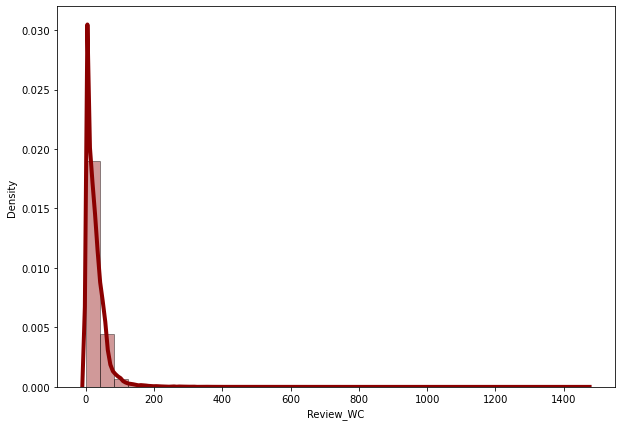

In [35]:
# Density plot and histogram of all word count
plt.figure(figsize=(10,7))
sns.distplot(df['Review_WC'], hist = True, kde = True,
            bins = int(180/5), color = 'darkred',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()


# Character Counts


In [36]:
# Creating column for character counts in the review text
df['Review_CC'] = df['Review'].str.len()
df[['Review_CC','Review']].head(10)

,Review_CC,Review
0,309,suitable school kid college student profession...
1,654,misrepresentation m office license one month ...
2,250,sell renew laptop look like renew laptop lapto...
3,126,amazon dupe specification battery suck nbspi s...
4,102,display back light issue display go month any...
5,41,battery life battery backup give one hour
6,125,professional work blue screen power linux oper...
7,47,monitor power issue monitor turn week purchase
8,39,waste waste money sometimes screen mark
9,32,able download warranty card good


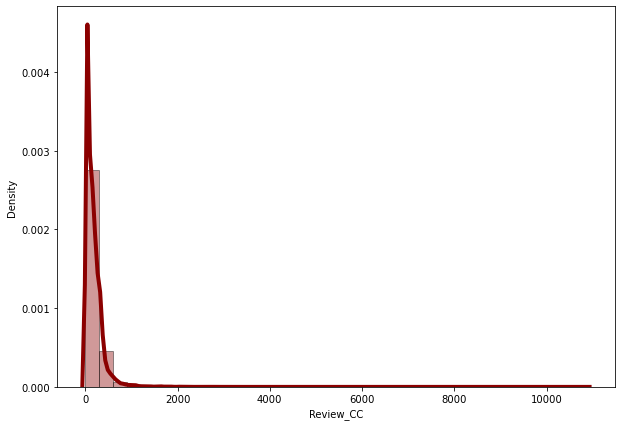

In [38]:
# Density plot and histogram of all character count
plt.figure(figsize=(10,7))
sns.distplot(df['Review_CC'], hist = True, kde = True,
            bins = int(180/5), color = 'darkred',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

# Removing Outliers

In [39]:
# Applying zscore to remove outliers
z_score = zscore(df[['Review_WC']])
abs_z_score = np.abs(z_score)
filtering_entry = (abs_z_score < 3).all(axis = 1)
df = df[filtering_entry]
print("We have {} Rows and {} Columns in our dataframe after removing outliers".format(df.shape[0], df.shape[1]))

We have 67260 Rows and 6 Columns in our dataframe after removing outliers


# Visualization

In [40]:
pandas_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Plotting histograms for word count and character count again after removing the outliers

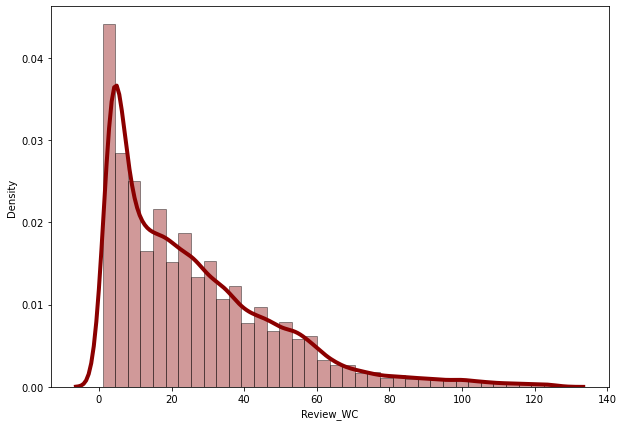

In [41]:
# Density plot and histogram of all word count
plt.figure(figsize=(10,7))
sns.distplot(df['Review_WC'], hist = True, kde = True,
            bins = int(180/5), color = 'darkred',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

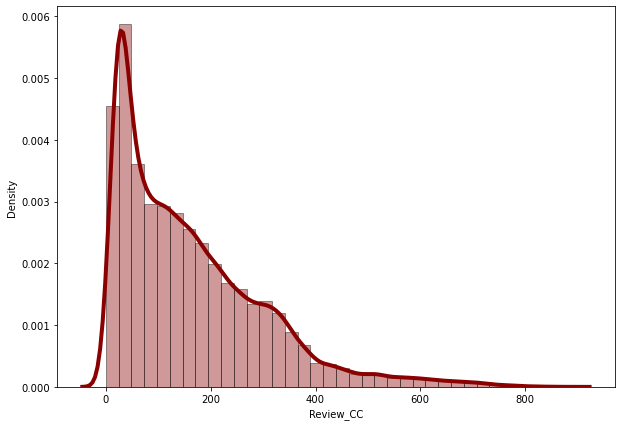

In [42]:
# Density plot and histogram of all character count
plt.figure(figsize=(10,7))
sns.distplot(df['Review_CC'], hist = True, kde = True,
            bins = int(180/5), color = 'darkred',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

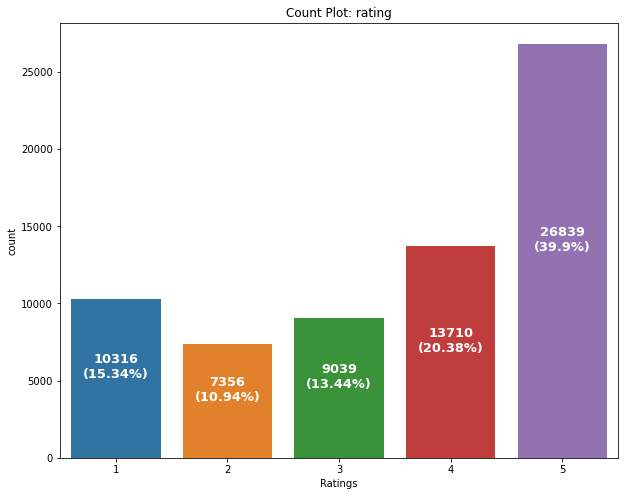

In [43]:
# Checking the ratings column details using count plot
x = 'Ratings'
fig, ax = plt.subplots(1,1,figsize=(10,8))
sns.countplot(x=x,data=df,ax=ax)
p=0
for i in ax.patches:
    q = i.get_height()/2
    val = i.get_height()
    ratio = round(val*100/len(df),2)
    prn = f"{val}\n({ratio}%)"
    ax.text(p,q,prn,ha="center",color="white",rotation=0,fontweight="bold",fontsize="13")
    p += 1
    
plt.title("Count Plot: rating")
plt.show()

Observation:

We can see that the highest number of customer rating received are for 5 stars

Then we have 4 star rating reviews present in our dataset

However we see a high 1 star rating as well compared to 2 and 3 star rating reviews

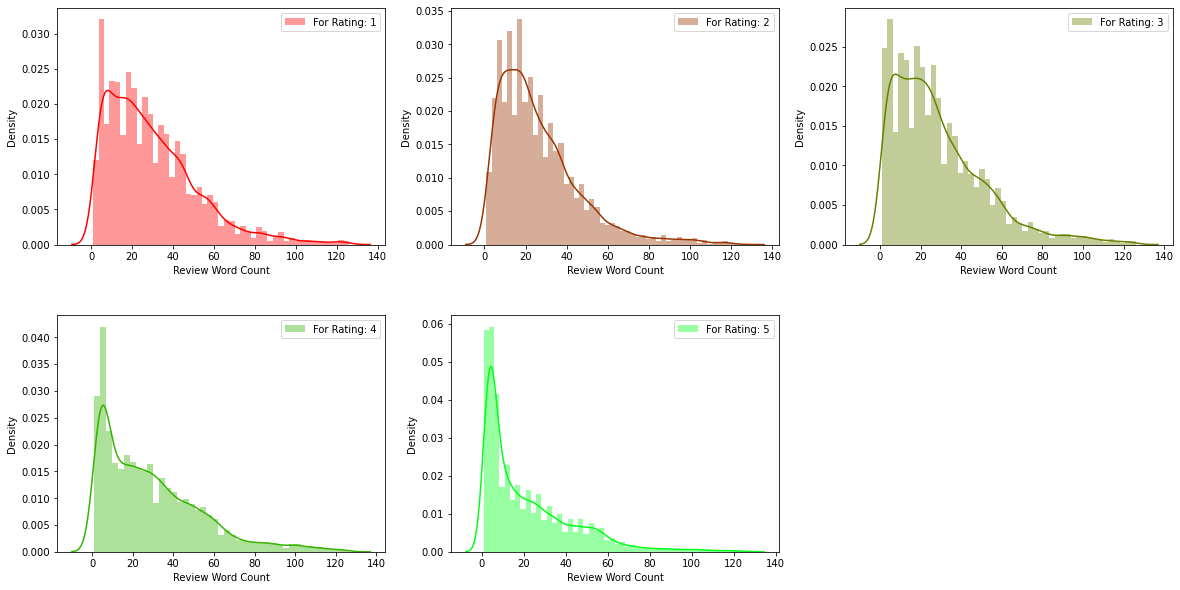

In [44]:
# Checking review word count distribution for each rating
ratings = np.sort(df.Ratings.unique())
cols = 3
rows = len(ratings)//cols
if rows % cols != 0:
    rows += 1
    
fig = plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace=0.3, wspace=0.2)
p = 1
colors = [(1,0,0,1),(0.6,0.2,0,1),(0.4,0.5,0,1),(0.2,0.7,0,1),(0,1,0.1,1)]
for i in ratings:
    axis = fig.add_subplot(rows,cols,p)
    sns.distplot(df.Review_WC[df.Ratings==i], ax=axis, label=f"For Rating: {i}", color=colors[i-1])
    axis.set_xlabel(f"Review Word Count")
    axis.legend()
    p += 1
    
plt.show()

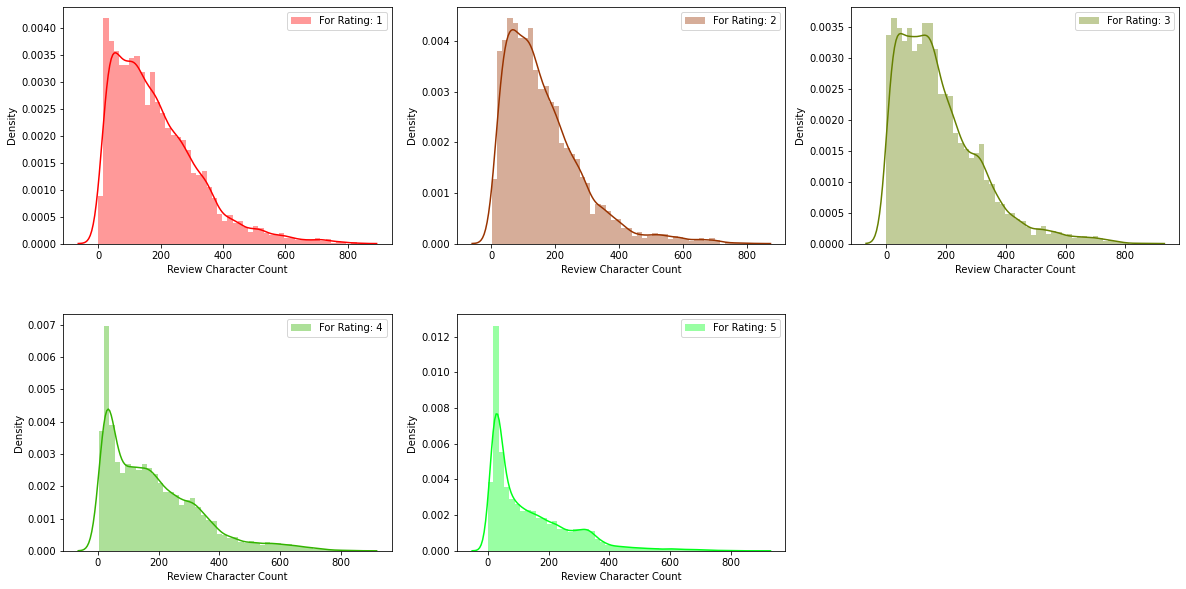

In [45]:
# Checking review character count distribution for each rating
ratings = np.sort(df.Ratings.unique())
cols = 3
rows = len(ratings)//cols
if rows % cols != 0:
    rows += 1
    
fig = plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace=0.3, wspace=0.2)
p = 1
colors = [(1,0,0,1),(0.6,0.2,0,1),(0.4,0.5,0,1),(0.2,0.7,0,1),(0,1,0.1,1)]
for i in ratings:
    axis = fig.add_subplot(rows,cols,p)
    sns.distplot(df.Review_CC[df.Ratings==i], ax=axis, label=f"For Rating: {i}", color=colors[i-1])
    axis.set_xlabel(f"Review Character Count")
    axis.legend()
    p += 1
    
plt.show()

5    26839
4    13710
1    10316
3     9039
2     7356
Name: Ratings, dtype: int64


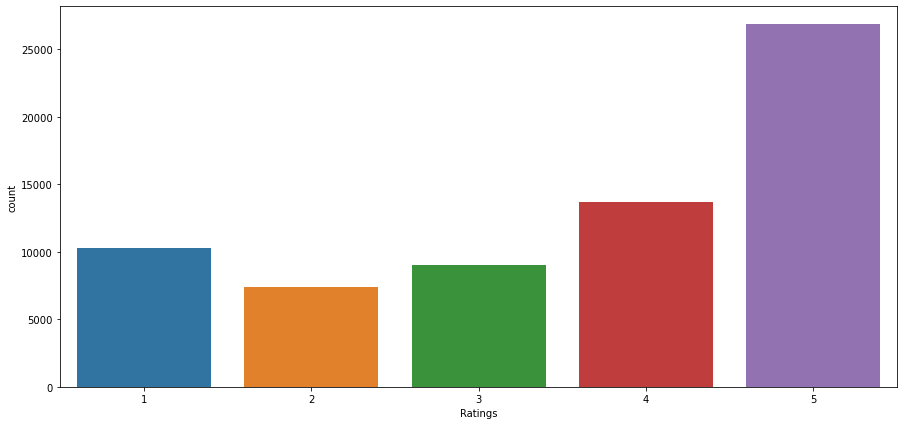

In [47]:
# Checking the count of target column values
plt.figure(figsize=(15,7))
sns.countplot(df['Ratings'])
print(df.Ratings.value_counts())
plt.show()

In [48]:
# shuffling the entire data set
df = df.sample(frac=1).reset_index(drop=True)
df

,Review_title,Review_text,Ratings,Review,Review_WC,Review_CC
0,Worth to buy,\n I have used 3 headset with 3 different co...,5,worth buy use headset different company mode...,54,345
1,Best product... Love it♥️,\n I'm use this watch with OnePlus 8 pro and ...,5,best product love use watch oneplus pro easil...,16,90
2,Awesome,I LOVE this phone,5,awesome love phone,3,18
3,*DON'T BUY*,\n I just ordered this product because of goo...,1,buy ordered product good review trust good arr...,39,246
4,"I Bought it looking at the reviews, Bad choice.","\n The sound is 6/10,<br>comfort6/10,<br>Buil...",2,buy look review bad choice sound comfort buil...,37,215
...,...,...,...,...,...,...
67255,Not recommend for calling,"\n If you are music listner, sound quality is...",2,recommend call music listner sound quality goo...,34,203
67256,Not straightforward,\n Does not recognize sim ... One has to ente...,3,straightforward recognize si one enter apn plu...,9,58
67257,Alexa is an eye wash!,\n This product doesn’t do what it is suppose...,1,alexa eye wash product suppose tracker inaccur...,47,321
67258,Worth every penny,Super good looking 😊,5,worth every penny super good look,6,33


In [49]:
# Select data from every Ratings category
df1 = df[df['Ratings']==1][0:7356]
df2 = df[df['Ratings']==2][0:7356]
df3 = df[df['Ratings']==3][0:7356]
df4 = df[df['Ratings']==4][0:7356]
df5 = df[df['Ratings']==5][0:7356]

# Combining all the dataframes into one and shuffling them again
df = pd.concat([df1,df2,df3,df4,df5], ignore_index=True)
df = df.sample(frac=1).reset_index(drop=True)
df

,Review_title,Review_text,Ratings,Review,Review_WC,Review_CC
0,Internet is too slow,\n Internet is too slow only in this device f...,2,internet slow internet slow device first day d...,25,162
1,Beware!!! Poor Quality,\n Touch is pathetic. It stopped working in 2...,2,beware poor quality touch pathetic stop work ...,13,78
2,its not working after 2-3 month please don't b...,\n its not working after 2-3 month please don...,1,work month please buy router work month plea...,34,196
3,Waste of money!,Worst product delivered by flipkart . Not made...,1,waste money bad product deliver flipkart make ...,23,128
4,UI can be better,\n The watch is comfortable to wear and looks...,4,ui good watch comfortable wear look premium ba...,63,396
...,...,...,...,...,...,...
36775,Awesome,Just loved it❤️,5,awesome love,2,12
36776,Not comfortable at all.,\n Product quality is good but it's not comfo...,2,comfortable product quality good comfortable e...,20,123
36777,Just what you expect,\n I just received the product today and I'm ...,4,expect receive product today honestly please g...,19,118
36778,Good laptop,\n Have been using for a week. Easy to instal...,5,good laptop use week easy install satisfy,7,41


1    7356
2    7356
3    7356
4    7356
5    7356
Name: Ratings, dtype: int64


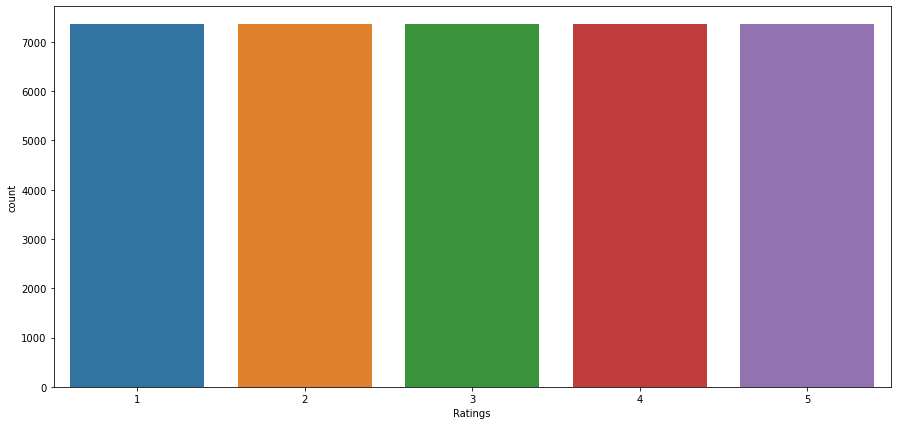

In [50]:
# lets Check the count of target column again to confirm the balance with a visual
plt.figure(figsize=(15,7))
sns.countplot(df['Ratings'])
print(df.Ratings.value_counts())
plt.show()

Top 30 most frequently occuring words

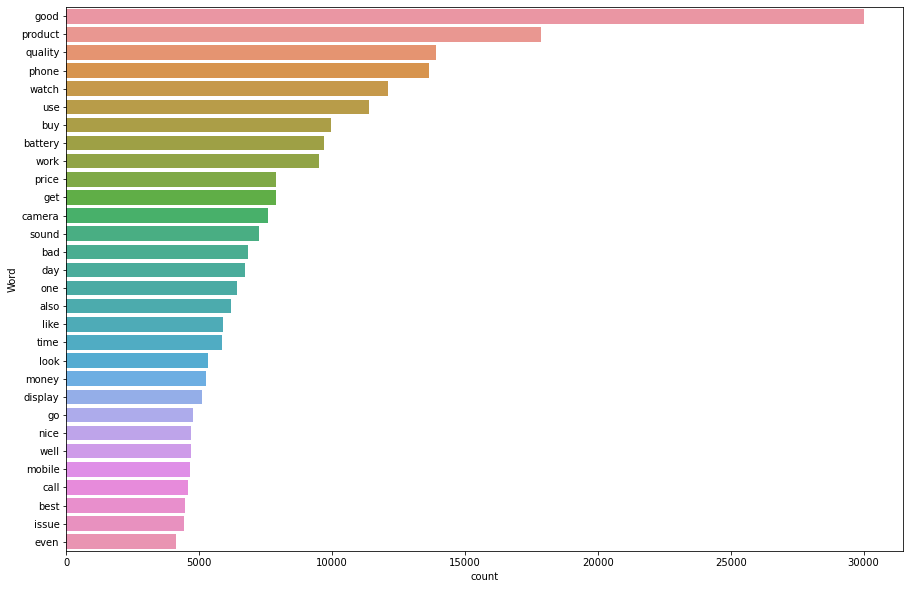

In [51]:
# Function to plot most frequent terms in our Review column
def freq_words(x, terms=30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()),
                             'count':list(fdist.values())})
    # selecting top 30 most frequent words
    dt = words_df.nlargest(columns='count', n=terms)
    plt.figure(figsize=(15,10))
    ax = sns.barplot(data=dt, x='count', y='word')
    ax.set(ylabel = 'Word')
    plt.show()
    
freq_words(df['Review'])    

Top 30 rarely occuring words

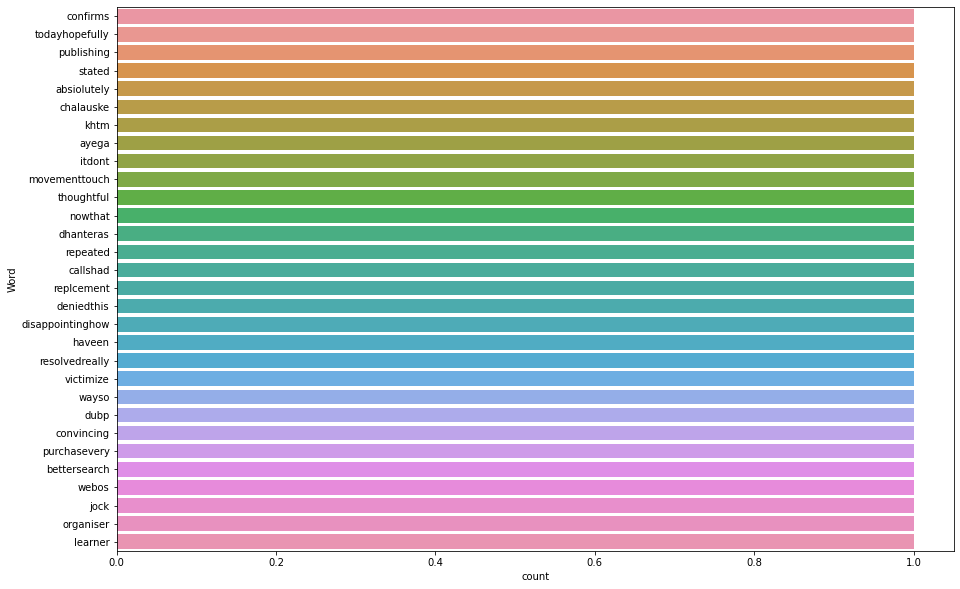

In [52]:
# Function to plot least frequent terms in our Review column
def rare_words(x, terms=30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()),
                             'count':list(fdist.values())})
    # selecting top 30 least freq rare words
    dt = words_df.nsmallest(columns='count', n=terms)
    plt.figure(figsize=(15,10))
    ax = sns.barplot(data=dt, x='count', y='word')
    ax.set(ylabel = 'Word')
    plt.show()
    
rare_words(df['Review'])    

# Model Building and Evaluation Metrics

In [53]:
# Separating features and labels here
x = df['Review']
y = df['Ratings']

Converting text into vectors using TfidfVectorizer

In [54]:
# Using the n_gram tfidf vectorizer (Word vectors)
word_vectorizer = TfidfVectorizer(sublinear_tf = True,
                                  strip_accents = 'unicode',
                                  analyzer = 'word',
                                  token_pattern = r'\w{1,}',
                                  stop_words = 'english',
                                  ngram_range = (1,3),
                                  max_features = 100000)
word_vectorizer.fit(x)
train_word_features = word_vectorizer.transform(x)

# Character vectors
char_vectorizer = TfidfVectorizer(sublinear_tf = True,
                                  strip_accents = 'unicode',
                                  analyzer = 'char',
                                  stop_words = 'english',
                                  ngram_range = (2,6),
                                  max_features = 50000)
char_vectorizer.fit(x)
train_char_features = char_vectorizer.transform(x)

# I will now combine both word vectors and character vectors as input for our model
train_features = hstack([train_char_features, train_word_features])

# Splitting the data into train and test datasets

In [55]:
state = 42
x_train, x_test, y_train, y_test = train_test_split(train_features, y, test_size = 0.30, random_state = state)

# Lets check the shapes of traning and test data
print("x_train", x_train.shape)
print("x_test", x_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

x_train (25746, 150000)
x_test (11034, 150000)
y_train (25746,)
y_test (11034,)


In [58]:
# Defining the Classification Machine Learning Algorithms
rf = RandomForestClassifier()
lr = LogisticRegression(solver='lbfgs')
svc = LinearSVC()
bnb = BernoulliNB()
mnb = MultinomialNB()
sgd = SGDClassifier()


# Creating a function to train and test the model with evaluation metrics
def BuiltModel(model):
    print('*'*30+model.__class__.__name__+'*'*30)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_train)
    pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, pred)*100
    print(f"ACCURACY SCORE PERCENTAGE:", accuracy)
    # Confusion matrix and Classification report
    print(f"CLASSIFICATION REPORT: \n {classification_report(y_test, pred)}")
    print(f"CONFUSION MATRIX: \n {confusion_matrix(y_test, pred)}\n")
    print("-"*120)
    print("\n")

# Training and testing of all the classification algorithms

In [60]:
for model in [lr,svc,bnb,mnb,sgd,rf]:
    BuiltModel(model)

******************************LogisticRegression******************************
ACCURACY SCORE PERCENTAGE: 70.57277505890883
CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           1       0.72      0.78      0.75      2205
           2       0.61      0.62      0.61      2209
           3       0.63      0.60      0.61      2264
           4       0.71      0.72      0.72      2200
           5       0.85      0.82      0.84      2156

    accuracy                           0.71     11034
   macro avg       0.71      0.71      0.71     11034
weighted avg       0.71      0.71      0.71     11034

CONFUSION MATRIX: 
 [[1712  336  121   31    5]
 [ 414 1360  348   71   16]
 [ 183  406 1351  257   67]
 [  43   88  252 1594  223]
 [  14   28   60  284 1770]]

------------------------------------------------------------------------------------------------------------------------


******************************LinearSVC******************************
ACCURAC

In [61]:
# I am checking cross-validation score only for those algorithms which are giving us better accuracies

def cross_val(model):
    print('*'*30+model.__class__.__name__+'*'*30)
    scores = cross_val_score(model,train_features,y, cv = 3).mean()*100
    print("Cross validation score:", scores)
    print("\n")
    
for model in [lr,svc,sgd,rf]:
    cross_val(model)    

******************************LogisticRegression******************************
Cross validation score: 70.46764545948886


******************************LinearSVC******************************
Cross validation score: 70.23654159869494


******************************SGDClassifier******************************
Cross validation score: 69.74170744970093


******************************RandomForestClassifier******************************
Cross validation score: 70.32898314301251




In [ ]:
# Lets select the different parameters for tuning our best model (RandomForestClassifier)
grid_params = {'n_estimators':[100,200],
               'criterion':['gini','entropy'],
               'max_depth': [500,800],
               'bootstrap':[True,False]}

# Train the model with given parameters using GridSearchCV
GSCV =  GridSearchCV(rf, grid_params, cv=3, verbose=3)
GSCV.fit(x_train, y_train)

In [63]:
# Final Model with the best chosen parameters list
best_model = RandomForestClassifier(bootstrap=False, criterion="gini", max_depth=800, n_estimators=200)
best_model.fit(x_train,y_train) # fitting data to the best model
pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test, pred)*100
# Printing the accuracy score
print("ACCURACY SCORE:", accuracy)
# Printing the classification report
print(f"\nCLASSIFICATION REPORT: \n {classification_report(y_test, pred)}")
# Printing the Confusion matrix
print(f"\nCONFUSION MATRIX: \n {confusion_matrix(y_test, pred)}")

ACCURACY SCORE: 71.3431212615552

CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           1       0.70      0.81      0.75      2205
           2       0.66      0.60      0.63      2209
           3       0.69      0.61      0.65      2264
           4       0.70      0.72      0.71      2200
           5       0.81      0.83      0.82      2156

    accuracy                           0.71     11034
   macro avg       0.71      0.71      0.71     11034
weighted avg       0.71      0.71      0.71     11034


CONFUSION MATRIX: 
 [[1794  266   86   42   17]
 [ 462 1330  274  111   32]
 [ 213  314 1375  261  101]
 [  60   83  199 1584  274]
 [  27   22   47  271 1789]]


In [65]:
joblib.dump(best_model, "Rating_Prediction_Saved_Model.pkl")

['Rating_Prediction_Saved_Model.pkl']

In [67]:
Model = joblib.load("Rating_Prediction_Saved_Model.pkl")

In [68]:
# Predicting test data using loaded model
prediction = Model.predict(x_test)
# Analysing Predicted vs Actual results
results = pd.DataFrame()
results['Predicted Review Ratings'] = prediction
results['Actual Review Ratings'] = y
results

,Predicted Review Ratings,Actual Review Ratings
0,5,2
1,1,2
2,3,1
3,2,1
4,2,4
...,...,...
11029,3,4
11030,1,2
11031,1,5
11032,2,2


In [70]:
#Converting the dataframe into CSV format and saving it
results.to_csv('PredictedvsActual_Ratings_Results.csv', index=False)